# Stellar Classification

This notebook implements a complete Machine Learning workflow with the 'Stellar Classification - SDSS17' dataset.

This dataset consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

Models used: KNN, XGBoost and Decision Tree.



## Imports and dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv('../input/stellar-classification-dataset-sdss17/star_classification.csv')

## Exploratory Data Analysis

In [ ]:
# Dataset shape
df.shape

(100000, 18)

In [ ]:
# Data types
df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [ ]:
# First 5 rows
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
# Number of examples in each class
df['class'].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [ ]:
# Convert categorical class values to numerical values
df['class'] = pd.factorize(df['class'])[0]

In [ ]:
df['class'].value_counts()

class
0    59445
2    21594
1    18961
Name: count, dtype: int64

In [ ]:
# Check for null values
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [ ]:
# Let’s analyze the correlation between the features and the label
corr = df.corr()
corr["class"].sort_values()

r             -0.076766
redshift      -0.054239
fiber_ID      -0.041586
run_ID        -0.036014
obj_ID        -0.036012
field_ID      -0.034833
u             -0.024645
g             -0.020066
alpha         -0.011756
spec_obj_ID   -0.010060
plate         -0.010060
z             -0.001614
MJD           -0.000405
delta          0.014452
i              0.015028
cam_col        0.023138
class          1.000000
rerun_ID            NaN
Name: class, dtype: float64

After analyzing the correlation of each feature with the label, we can eliminate those features that have a low correlation and are also insignificant for the objective of the problem, such as the object ID, which does not contribute anything to us.

In [ ]:
# Drop features
df.drop(['obj_ID','run_ID','rerun_ID','field_ID','fiber_ID'], axis=1, inplace=True)

## Modelling

In [ ]:
X = df.drop('class', axis=1)
y = df['class']

# Split the data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

### K-Nearest Neighbors (KNN)

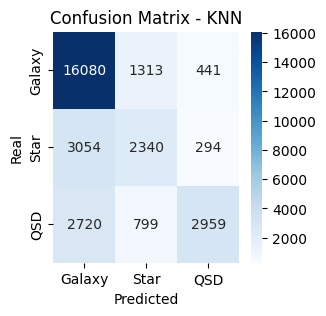

KNN Accuracy:  0.7126333333333333


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=15)

# Train
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

tags = ["Galaxy", "Star", "QSD"]

plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap="Blues", xticklabels=tags, yticklabels=tags)
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix - KNN')
plt.show()

print('KNN Accuracy: ', accuracy_knn)

In [ ]:
# Test different K values for the model
for i in range(1,25):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)

    y_pred_knn = knn_model.predict(X_test)

    accuracy_knn = accuracy_score(y_test, y_pred_knn)

    print(f'Value of K: {i}, Accuracy: {accuracy_knn}')

Value of K: 1, Accuracy: 0.6421
Value of K: 2, Accuracy: 0.6919333333333333
Value of K: 3, Accuracy: 0.6917
Value of K: 4, Accuracy: 0.7005333333333333
Value of K: 5, Accuracy: 0.7070666666666666
Value of K: 6, Accuracy: 0.7070333333333333
Value of K: 7, Accuracy: 0.7089666666666666
Value of K: 8, Accuracy: 0.7101333333333333
Value of K: 9, Accuracy: 0.7103333333333334
Value of K: 10, Accuracy: 0.7087666666666667
Value of K: 11, Accuracy: 0.7113666666666667
Value of K: 12, Accuracy: 0.7112333333333334
Value of K: 13, Accuracy: 0.7119666666666666
Value of K: 14, Accuracy: 0.7113
Value of K: 15, Accuracy: 0.7126333333333333
Value of K: 16, Accuracy: 0.7118
Value of K: 17, Accuracy: 0.7119333333333333
Value of K: 18, Accuracy: 0.7106666666666667
Value of K: 19, Accuracy: 0.7120333333333333
Value of K: 20, Accuracy: 0.7115333333333334
Value of K: 21, Accuracy: 0.7090666666666666
Value of K: 22, Accuracy: 0.709
Value of K: 23, Accuracy: 0.7087
Value of K: 24, Accuracy: 0.7094666666666667


### XGBoost

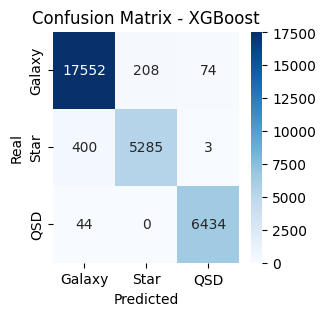

XGBoost F1 Score:  0.975582231517532
XGBoost Accuracy:  0.9757


In [ ]:
xgb_model = XGBClassifier(random_state= 0)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

# F1 score
f1 = f1_score(y_test, y_pred_xgb, average='weighted')

xgboost_accuracy_score = accuracy_score(y_test, y_pred_xgb)

conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap="Blues", xticklabels=tags, yticklabels=tags)
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix - XGBoost')
plt.show()

print('XGBoost F1 Score: ', f1)
print('XGBoost Accuracy: ', xgboost_accuracy_score)

### Decision Tree

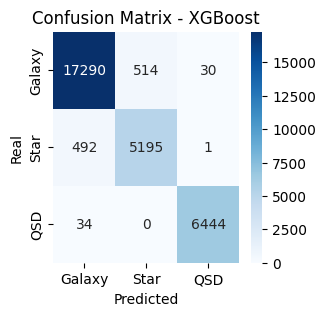

Accuracy:  0.9643


In [ ]:
dt_model = DecisionTreeClassifier()

# Train
dt_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the classifier
dt_accuracy = accuracy_score(y_test, y_pred_dt)

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap="Blues", xticklabels=tags, yticklabels=tags)
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix - XGBoost')
plt.show()

print('Accuracy: ', dt_accuracy)

## Evaluation

In [ ]:
data = {
    'Model': ['KNN', 'Xgboost', 'Decision Tree'],
    'Accuracy': [accuracy_knn, xgboost_accuracy_score, dt_accuracy]
}

results_df = pd.DataFrame(data)
print(results_df.sort_values('Accuracy', ascending=False))

           Model  Accuracy
1        Xgboost  0.975700
2  Decision Tree  0.964300
0            KNN  0.709467
